_Не прикрепил файл который используется в задании. Создал новый репозиторий, все переложил туда._

https://github.com/denicCH/Mathematical-Statistics/tree/master/%D0%A3%D1%80%D0%BE%D0%BA_3

__Загрузите данные из файла global_power_plant_database.csv (https://drive.google.com/file/d/1S4TJpDqYwXzyIomrinpYHYbowWrdsAyv/view?usp=sharing). Рассчитайте среднее значение, моду, медиану, среднее квадратичное отклонение, смещенную и несмещенную дисперсию для capacity_mw и estimated_generation_gwh. Определите первый, второй и третий квартили. Визуализируйте данные с помощью гистограммы и boxplot (не забудьте про подписи к переменным и названия графиков).__

Таблица содержит следующие поля:

country - страна расположения;

name - название электростанции;

capacity_mw - мощность электростанции в гигаваттах;

primary_fuel - используемый источник энергии;

latitude - географическая широта расположения электростанции в градусах; WGS84 (EPSG:4326);

longitude - географическая долгота расположения электростанции в градусах; WGS84 (EPSG:4326);

estimated_generation_gwh - прогнозируемая выработка электричества в гигаватт-часах в 2014 году.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
def stat_characteristics(df):
    '''
    Функция принимает в качестве аргумента DataFrame, для каждого столбца которого будет подчитаны следующие
    статистические характеристики: "среднее значение", "мода", "медиана", "среднее квадратичное отклонение",
    "смещенная дисперсия",   "несмещенная дисперсия".
    Возвращает DataFrame содержащий статистические характеристики.
    
    '''
    count_columns = len(df.columns)    
    names_columns = ["среднее значение",
                     "мода",
                     "медиана",
                     "среднее квадратичное отклонение",
                     "смещенная дисперсия",
                     "несмещенная дисперсия"]
    df_dist = {'stat_characteristics':names_columns}
    
    def stat(df_column):
        return [
            df_column.mean(),
            df_column.mode()[0],
            df_column.median(),
            df_column.std(),
            df_column.var(ddof=0),
            df_column.var(ddof=1)            
        ]
        
    for i in range(0,count_columns):
        current_name_column = df.columns.tolist()[i]
        df_dist[current_name_column] = stat(df[current_name_column])

    return pd.DataFrame(df_dist) 

Загружаем данные из файла, удаляем дубликаты, выбираем только интересующие нас столбцы, удаляем строки, для которых estimated_generation_gwh = NaN.

In [37]:
df = pd.read_csv('global_power_plant_database.csv', sep=";")
df = df.drop_duplicates(["capacity_mw","estimated_generation_gwh"])
nul = df[df["estimated_generation_gwh"].isnull()]
res_df = df[["capacity_mw","estimated_generation_gwh"]]
res_df = res_df.drop(nul.index, axis=0) #Удаляем строки, для которых estimated_generation_gwh = NaN

In [38]:
x1 = res_df['capacity_mw']
log_x1 = np.log(x1)
x2 = res_df['estimated_generation_gwh']
log_x2 = np.log(x1)
log_x1

d = res_df.copy()
d['log(capacity mw)'] = log_x1
d['log(estimated generation gwh)'] = log_x2

result = stat_characteristics(d)
result.style.set_properties(**{'text-align': 'left'})

,stat_characteristics,capacity_mw,estimated_generation_gwh,log(capacity mw),log(estimated generation gwh)
0,среднее значение,250.206,1157.63,3.64396,3.64396
1,мода,10,0,2.30259,2.30259
2,медиана,33.45,117.028,3.51005,3.51005
3,среднее квадратичное отклонение,662.403,5243.3,2.05104,2.05104
4,смещенная дисперсия,438741,2.74899e+07,4.20641,4.20641
5,несмещенная дисперсия,438778,2.74922e+07,4.20676,4.20676


#### Так как данные имеют большие, размах и разброс значений, то построим дополнительно графики для прологарифмированных значений выборки.

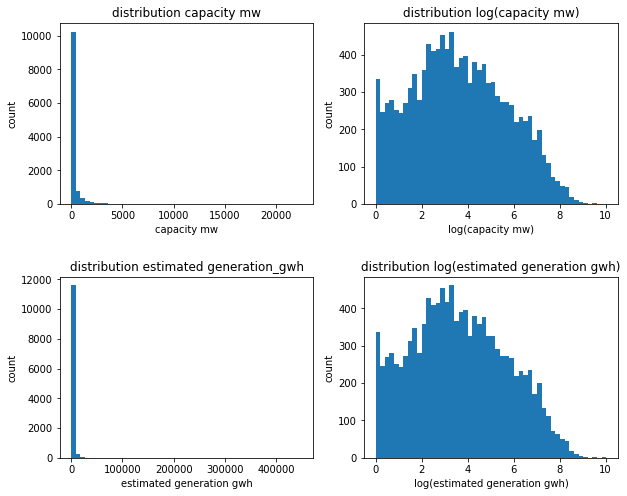

In [19]:

bins = 50

fig, ax = plt.subplots(nrows=2, ncols=2)
ax1,ax2,ax3,ax4 = ax.flatten()

fig.set_size_inches(10, 8)

ax1.hist(x1, bins=bins)
ax1.set_title("distribution capacity mw")
ax1.set_xlabel("capacity mw")
ax1.set_ylabel("count")

ax2.hist(log_x1, bins=bins)
ax2.set_title("distribution log(capacity mw)")
ax2.set_xlabel("log(capacity mw)")
ax2.set_ylabel("count")

ax3.hist(x2, bins=bins)
ax3.set_title("distribution estimated generation_gwh")
ax3.set_xlabel("estimated generation gwh")
ax3.set_ylabel("count")

ax4.hist(log_x2, bins=bins)
ax4.set_title("distribution log(estimated generation gwh)")
ax4.set_xlabel("log(estimated generation gwh)")
ax4.set_ylabel("count")
fig.subplots_adjust(wspace=0.2, hspace=0.4)


Text(0, 0.5, 'estimated generation gwh')

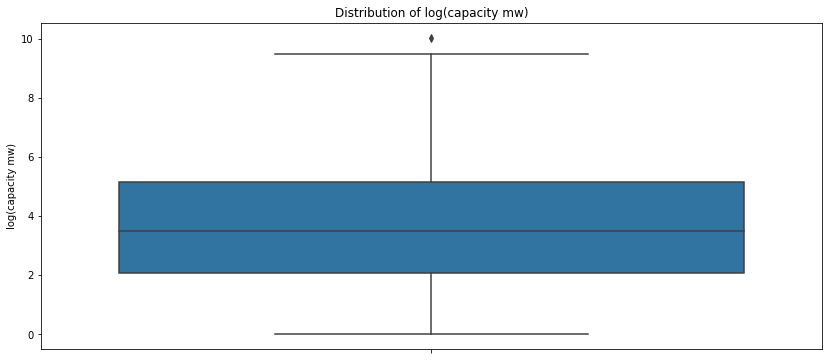

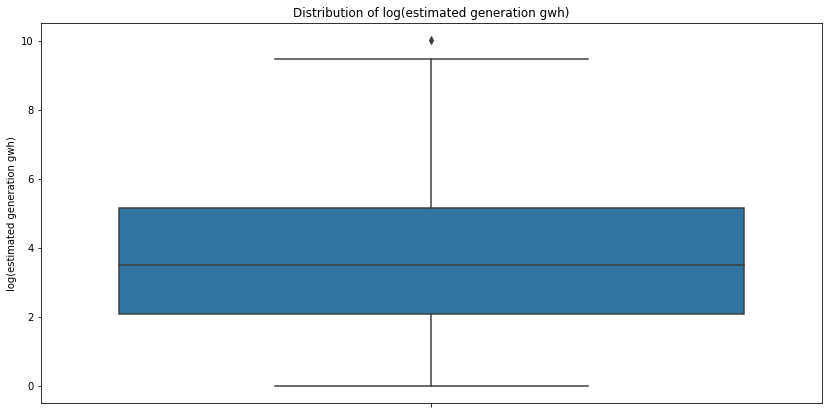

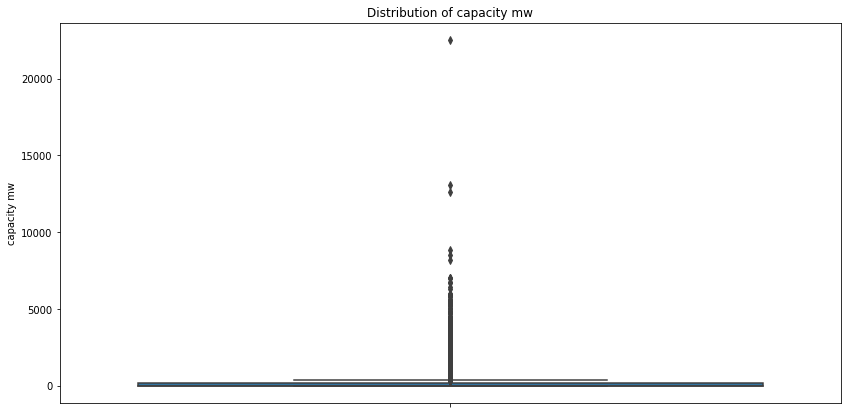

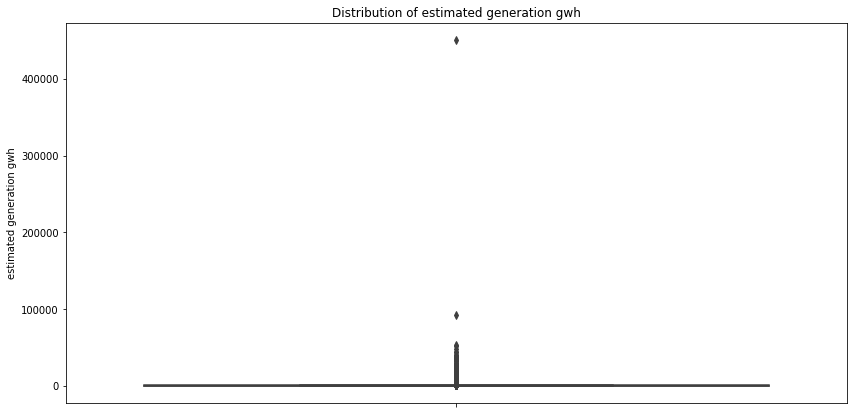

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(log_x1, orient='v')
plt.ylabel('log(capacity mw)')
plt.title('Distribution of log(capacity mw)');

plt.figure(figsize=(14, 7))
sns.boxplot(log_x2, orient='v')
plt.title('Distribution of log(estimated generation gwh)');
plt.ylabel('log(estimated generation gwh)')

plt.figure(figsize=(14, 7))
sns.boxplot(x1, orient='v')
plt.title('Distribution of capacity mw');
plt.ylabel('capacity mw')

plt.figure(figsize=(14, 7))
sns.boxplot(x2, orient='v')
plt.title('Distribution of estimated generation gwh');
plt.ylabel('estimated generation gwh')